In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt

import seaborn as sns

import sys; sys.path.append("../")
from scripts.metrics import make_metrics_plots

plt.style.use("../netflix.mplstyle")

In [2]:
df = pd.DataFrame(
    data=['50 First Dates',
            'Click',
            'Big Daddy',
            'Hotel Transylvania 3: Summer Vacation',
            'Bedtime Stories',
            'Little Nicky',
            'The Waterboy',
            'The Do-Over',
            'Murder Mystery',
            'Sandy Wexler',
            'Mr. Deeds',
            'Anger Management',
            'The Ridiculous 6',
            'Grown Ups',
            'Hubie Halloween',
            "You Don't Mess with the Zohan",
            'Uncut Gems',
            'The Week Of',
            'ADAM SANDLER 100% FRESH',
            'The Meyerowitz Stories (New and Selected)'
        ],
    columns=['expected']
)
df.index.rename('ranking', inplace=True)

df['unweighted_search'] = pd.Series([
    '50 First Dates',
    'Big Daddy',
    'Click',
    'The Do-Over',
    'The Waterboy',
    'Bedtime Stories',
    'Little Nicky',
    'The Longest Yard',
    'Mr. Deeds',
    'Sandy Wexler',
    'Hubie Halloween',
    'Murder Mystery',
    'The Ridiculous 6',
    'Anger Management',
    "You Don't Mess with the Zohan",
    'Uncut Gems',
    'Grown Ups',
    'The Week Of',
    'Hotel Transylvania',
    'Father of the Year'
])

df['weighted_field_search'] = pd.Series([
    '50 First Dates',
    'Murdery Mystery',
    'ADAM SANDLER 100% FRESH',
    'Hubie Halloween',
    'Uncut Gems',
    'The Do-Over',
    'Big Daddy',
    'Click',
    'Little Nicky',
    'The Waterboy',
    'Mr. Deeds',
    'Sandy Wexler',
    "You Don't Mess with the Zohan",
    'Hotel Transylvania 3: Summer Vacation',
    'Grown Ups',
    'Anger Management',
    'The Week Of',
    'Bedtime Stories',
    'A Walk to Remember',
    'The Longest Yard'
])

df['full_weighted'] = pd.Series([
    '50 First Dates',
    'Click',
    'Big Daddy',
    'Murder Mystery',
    'The Do-Over',
    'Hubie Halloween',
    'Uncut Gems',
    'Little Nicky',
    'The Waterboy',
    'Mr. Deeds',
    'Hotel Transylvania 3: Summer Vacation',
    'Sandy Wexler',
    "You Don't Mess with the Zohan",
    'Grown Ups',
    'Anger Management',
    'The Week Of',
    'Bedtime Stories',
    'ADAM SANDLER 100% FRESH',
    'A Walk to Remember',
    'The Show Must Go On: The Queen + Adam Lambert Story'
])

In [3]:
display(df)

,expected,unweighted_search,weighted_field_search,full_weighted
ranking,,,,
0,50 First Dates,50 First Dates,50 First Dates,50 First Dates
1,Click,Big Daddy,Murdery Mystery,Click
2,Big Daddy,Click,ADAM SANDLER 100% FRESH,Big Daddy
3,Hotel Transylvania 3: Summer Vacation,The Do-Over,Hubie Halloween,Murder Mystery
4,Bedtime Stories,The Waterboy,Uncut Gems,The Do-Over
5,Little Nicky,Bedtime Stories,The Do-Over,Hubie Halloween
6,The Waterboy,Little Nicky,Big Daddy,Uncut Gems
7,The Do-Over,The Longest Yard,Click,Little Nicky
8,Murder Mystery,Mr. Deeds,Little Nicky,The Waterboy


## Precision, Recall, AP

In [4]:
relevant = df.loc[:, ['expected']]
relevant['is_relevant'] = relevant.apply(lambda row: 'R' if row.name < 0.6 * relevant['expected'].size else 'N', axis=1)

search_results = df.loc[:, ['unweighted_search', 'weighted_field_search', 'full_weighted']]
search_results.loc[:, 'unweighted_search'] = search_results[['unweighted_search']].apply(lambda row: relevant.loc[relevant['expected'] == row['unweighted_search'], 'is_relevant'].iloc[0] if row['unweighted_search'] in set(relevant['expected']) else 'N', axis=1)
search_results.loc[:, 'weighted_field_search'] = search_results[['weighted_field_search']].apply(lambda row: relevant.loc[relevant['expected'] == row['weighted_field_search'], 'is_relevant'].iloc[0] if row['weighted_field_search'] in set(relevant['expected']) else 'N', axis=1)
search_results.loc[:, 'full_weighted'] = search_results[['full_weighted']].apply(lambda row: relevant.loc[relevant['expected'] == row['full_weighted'], 'is_relevant'].iloc[0] if row['full_weighted'] in set(relevant['expected']) else 'N', axis=1)

search_results

,unweighted_search,weighted_field_search,full_weighted
ranking,,,
0,R,R,R
1,R,N,R
2,R,N,R
3,R,N,R
4,R,N,R
5,R,R,N
6,R,R,N
7,N,R,R
8,R,R,R


P@10: 0.9
R@10: 0.8181818181818182
AP: 0.9737654320987654
-----------------
P@10: 0.6
R@10: 0.5454545454545454
AP: 0.4556437389770723
-----------------
P@10: 0.8
R@10: 0.6666666666666666
AP: 0.8972663139329806
-----------------


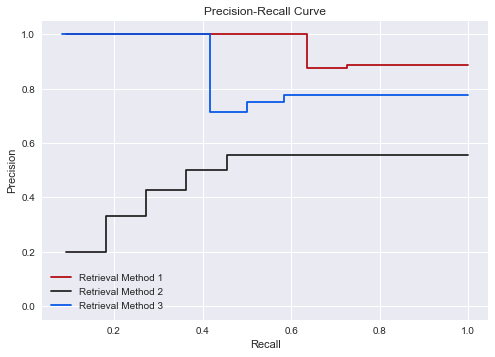

In [5]:
make_metrics_plots(search_results.transpose().values.tolist(), 'search1')

# NDCG

In [6]:
def calc_ndcg(expected : pd.Series, data : pd.Series, first_n : int = 10):
    relevance_grade = pd.DataFrame(data=expected)
    relevance_grade.columns = ['expected']
    relevance_grade['grade'] = pd.Series([5 - i // (expected.size//5) for i in range(expected.size)])
    relevance_grade['grade'].fillna(0, inplace=True)

    calc = pd.DataFrame(data.iloc[0:first_n])
    calc.columns = ['title']
    calc['relevance'] = calc.apply(lambda row : relevance_grade.loc[relevance_grade['expected']==row['title'], 'grade'].iloc[0] if row['title'] in set(relevance_grade['expected']) else 0, axis=1)
    calc['aux_dcg'] = calc.apply(lambda row : (2**row['relevance']-1) / np.log2(row.name + 2), axis=1)
    calc['dcg@k'] = calc.apply(lambda row: np.sum(calc.loc[0:row.name, 'aux_dcg']), axis=1)
    
    calc['aux_idcg'] = relevance_grade.apply(lambda row : (2**row['grade']-1) / np.log2(row.name + 2), axis=1)
    calc['idcg@k'] = calc.apply(lambda row: np.sum(calc.loc[0:row.name, 'aux_idcg']), axis=1)
    
    calc['ndcg@k'] = calc['dcg@k']/calc['idcg@k']

    calc.drop(columns=['aux_dcg', 'aux_idcg'], inplace=True)

    return calc, relevance_grade


In [7]:
result_unweighted, relevance_grade = calc_ndcg(df['expected'], df['unweighted_search'])
result_weighted_field, _ = calc_ndcg(df['expected'], df['weighted_field_search'])
result_full_weighted, _ = calc_ndcg(df['expected'], df['full_weighted'])

display(result_unweighted, result_weighted_field, result_full_weighted, relevance_grade)


,title,relevance,dcg@k,idcg@k,ndcg@k
ranking,,,,,
0,50 First Dates,5,31.000000,31.000000,1.000000
1,Big Daddy,5,50.558822,50.558822,1.000000
2,Click,5,66.058822,66.058822,1.000000
3,The Do-Over,4,72.518971,79.409796,0.913224
4,The Waterboy,4,78.321763,85.212588,0.919134
5,Bedtime Stories,4,83.664871,90.555696,0.923905
6,Little Nicky,4,88.664871,95.555696,0.927887
7,The Longest Yard,0,88.664871,100.287669,0.884105
8,Mr. Deeds,3,90.772081,102.394879,0.886490


,title,relevance,dcg@k,idcg@k,ndcg@k
ranking,,,,,
0,50 First Dates,5,31.000000,31.000000,1.000000
1,Murdery Mystery,0,31.000000,50.558822,0.613147
2,ADAM SANDLER 100% FRESH,1,31.500000,66.058822,0.476848
3,Hubie Halloween,2,32.792030,79.409796,0.412947
4,Uncut Gems,1,33.178882,85.212588,0.389366
5,The Do-Over,4,38.521990,90.555696,0.425396
6,Big Daddy,5,48.855324,95.555696,0.511276
7,Click,5,58.634735,100.287669,0.584665
8,Little Nicky,4,63.150185,102.394879,0.616732


,title,relevance,dcg@k,idcg@k,ndcg@k
ranking,,,,,
0,50 First Dates,5,31.000000,31.000000,1.000000
1,Click,5,50.558822,50.558822,1.000000
2,Big Daddy,5,66.058822,66.058822,1.000000
3,Murder Mystery,3,69.073558,79.409796,0.869837
4,The Do-Over,4,74.876350,85.212588,0.878701
5,Hubie Halloween,2,75.944972,90.555696,0.838655
6,Uncut Gems,1,76.278305,95.555696,0.798260
7,Little Nicky,4,81.010278,100.287669,0.807779
8,The Waterboy,4,85.525728,102.394879,0.835254


,expected,grade
ranking,,
0,50 First Dates,5
1,Click,5
2,Big Daddy,5
3,Hotel Transylvania 3: Summer Vacation,5
4,Bedtime Stories,4
5,Little Nicky,4
6,The Waterboy,4
7,The Do-Over,4
8,Murder Mystery,3


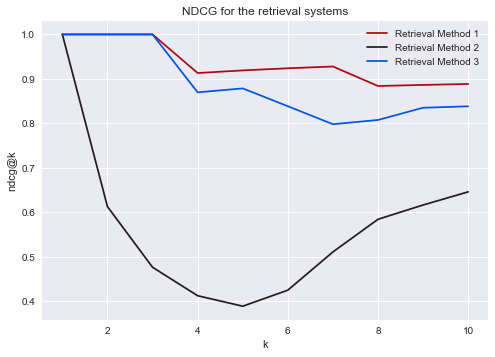

In [8]:
fig, ax = plt.subplots()

sns.lineplot(data=result_unweighted, y='ndcg@k', x=np.arange(1, 11), ax=ax, label='Retrieval Method 1')
sns.lineplot(data=result_weighted_field, y='ndcg@k', x=np.arange(1, 11), ax=ax, label='Retrieval Method 2')
sns.lineplot(data=result_full_weighted, y='ndcg@k', x=np.arange(1, 11), ax=ax, label='Retrieval Method 3')

ax.set_xlabel('k')
ax.set_title('NDCG for the retrieval systems')

fig.savefig('../images/svg/search1_ndcg.svg', format="svg")
fig.savefig('../images/png/search1_ndcg.png', format="png", dpi=150, bbox_inches="tight")